In [1]:
using LinearAlgebra
using Plots
using BSON: @load

In [2]:
# load dataset
@load "vineQVF.bson" Q V F
numPins, numTimesteps = size(Q)

(40, 165)

In [3]:
# set up for optimization
A = [Q' V']
A = kron(A,Matrix(I,numPins,numPins))

y = vec(F);

In [4]:
# weights matrix
W = 0.01I

UniformScaling{Float64}
0.01*I

In [5]:
# extract cols of A corresponding to tridiagonal elements of K and C
upIdx = [i for i = numPins+1:numPins+1:numPins^2]
diagIdx = [i for i = 1:numPins+1:numPins^2]
lowIdx = [i for i = 2:numPins+1:numPins^2]

tridiagIdx = [lowIdx; diagIdx; upIdx]
KCTridiagIdx = [tridiagIdx; numPins^2 .+ tridiagIdx]

A = A[:, KCTridiagIdx]
numParams = length(KCTridiagIdx)

236

In [6]:
# solve regularized least squares
x = (A'*A + W)\(A'*y);

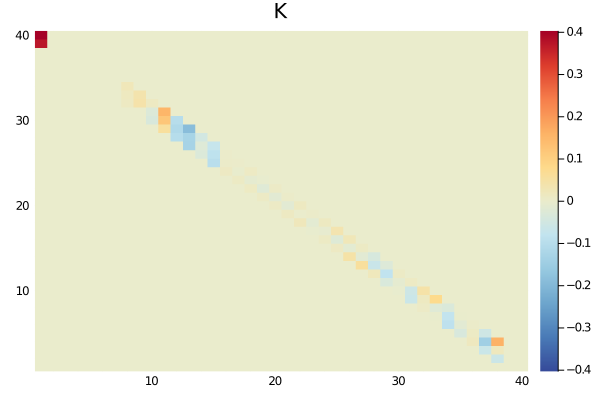

In [7]:
# show K
Kparams = x[1:Int(numParams/2)]

lower = Kparams[1:numPins-1]
diag = Kparams[numPins:2*numPins-1]
upper = Kparams[2*numPins:end]

K = Tridiagonal(lower, diag, upper)

lim = maximum(abs.(K))
theme(:vibrant)
heatmap(reverse(Matrix(K), dims=1), title="K", clim=(-lim,lim))

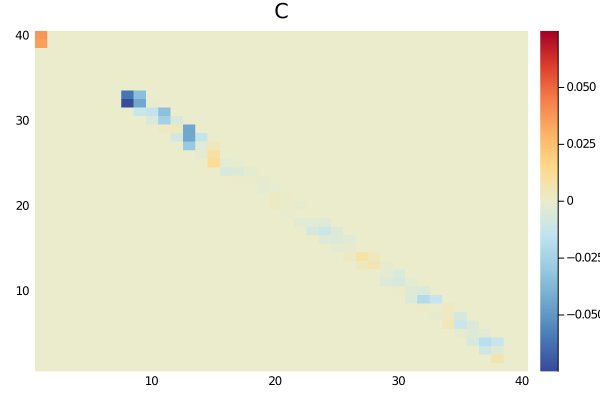

In [8]:
# show K
Cparams = x[1+Int(numParams/2):end]

lower = Cparams[1:numPins-1]
diag = Cparams[numPins:2*numPins-1]
upper = Cparams[2*numPins:end]

C = Tridiagonal(lower, diag, upper)

lim = maximum(abs.(C))
theme(:vibrant)
heatmap(reverse(Matrix(C), dims=1), title="C", clim=(-lim,lim))

In [9]:
# compute goodness of fit
SSR = (A*x-y)'*(A*x-y)
SST = norm(y .- sum(y)/length(y))^2
Rsq = 1.0 - SSR/SST

0.20966149025426262